### Goal :   Using the collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 


In [207]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

In [208]:
df = pd.read_csv("bank-full.csv")

In [209]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### Deliverable – 1 (Exploratory data quality report reflecting the following)

1.	Univariate analysis
a.	Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

2.	Multivariate analysis
a.	Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes. 

3.	Strategies to address the different data challenges such as data pollution, outliers and missing values. 


In [210]:
df.shape

(45211, 17)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Distribution of Target Variable

no     39922
yes     5289
Name: Target, dtype: int64


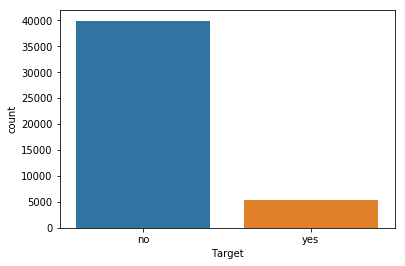

In [212]:
print(df['Target'].value_counts())
sns.countplot(df.Target)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D5772A43C8>,
      dtype=object)

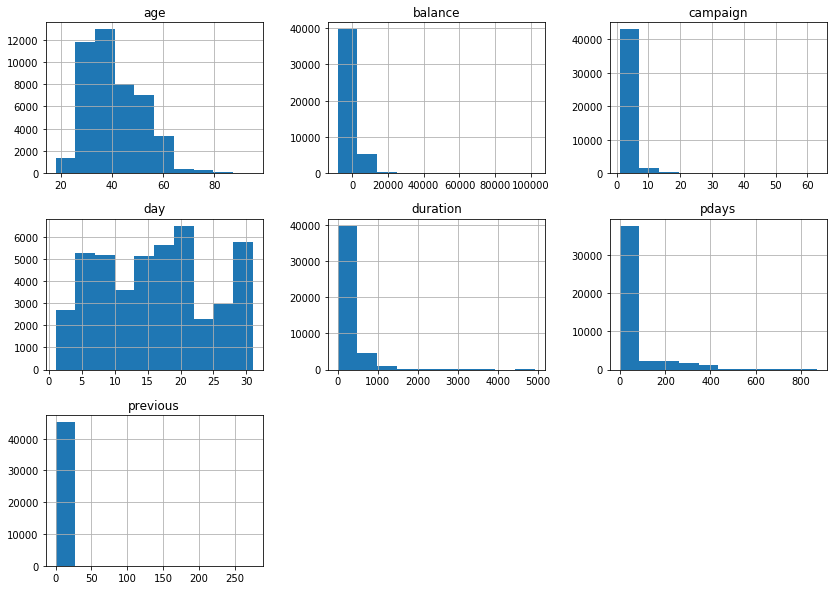

In [213]:
df.hist(figsize=(14,10))

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

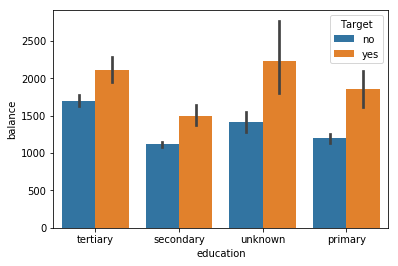

In [214]:
sns.barplot(x="education", y="balance", hue="Target", data=df)

# Findings: More the level of education, more the balance
df["education"].value_counts()

In [215]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

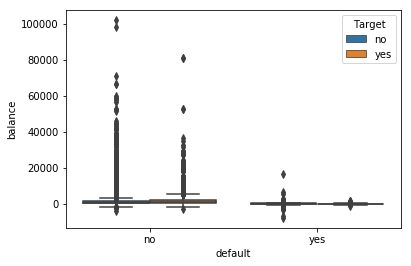

In [216]:
sns.boxplot(x="default", y="balance", hue="Target", data=df)

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student'),
 Text(0, 0, 'unknown')]

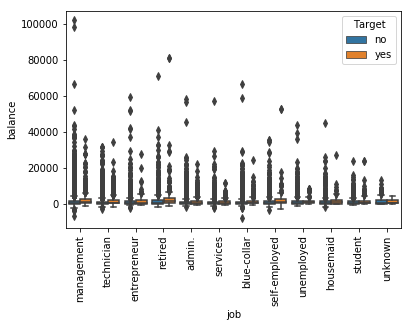

In [217]:
bx = sns.boxplot(x="job", y="balance", hue="Target", data=df)
bx.set_xticklabels(df["job"].unique(), rotation=90)

# Findings: Customers with job desciption ; Management and Retired are more likely to subscribe term deposit and thus increase 
#           the hit ratio.

In [218]:
df['marital'].value_counts()

married     26054
single      12262
divorced     5038
Name: marital, dtype: int64

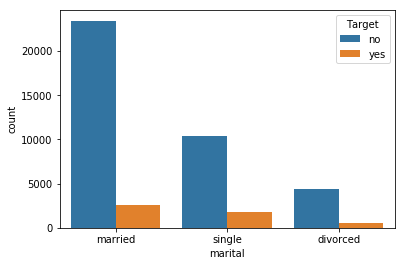

In [219]:
sns.countplot(x="marital", hue="Target", data=df)

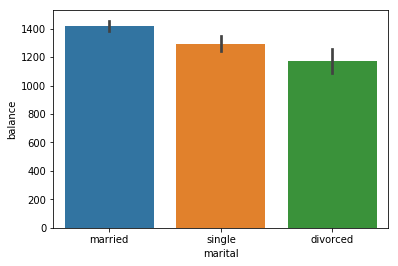

In [220]:
# Distribution of balance by marital status
sns.barplot(x="marital", y="balance", data=df)

#Findings: Divorced have low amount of balance 

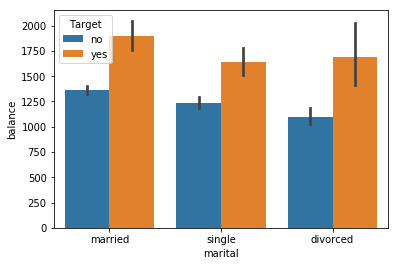

In [221]:
# Distribution of balance by marital status and Target status
sns.barplot(x="marital", y="balance", hue="Target", data=df)

# Findings: Married customers have better balance and have converted more into Term Depositors

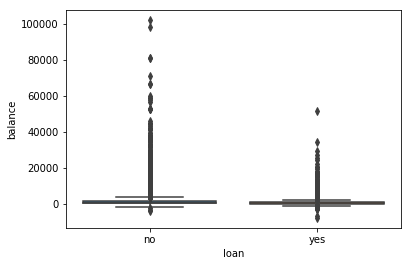

In [222]:
sns.boxplot(x="loan", y="balance", data=df)

# Findings: Person who has loan has less balance, and hence less chances of buying the Term Deposits

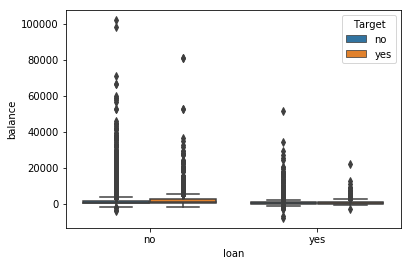

In [223]:
sns.boxplot(x="loan", y="balance", hue="Target", data=df)

# Customers with no Loan are more likely to buy the Term Deposits as their balance is more

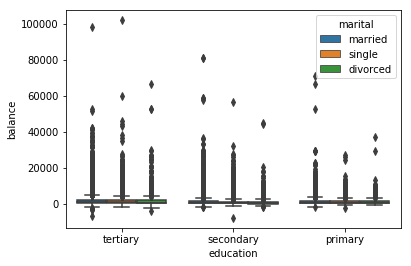

In [224]:
sns.boxplot(x="education", y="balance", hue="marital", data=df)

# Findings: Single Tertiary educated customers have more balance and hence more chances of buying the Term Deposit

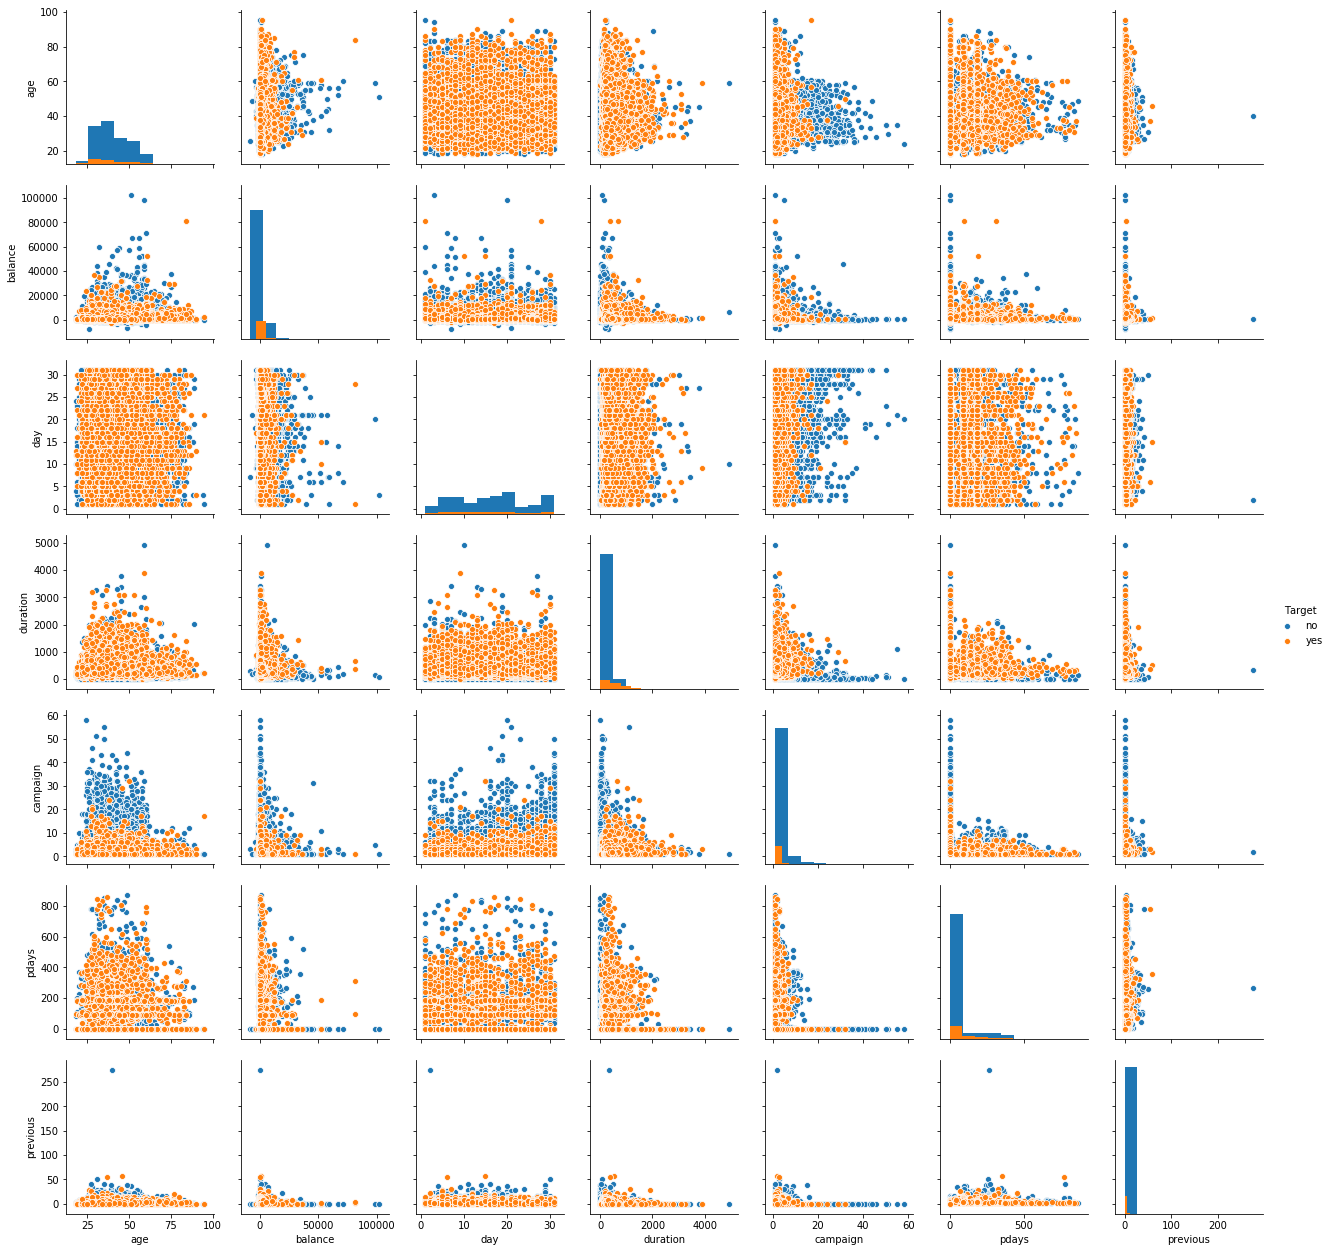

In [225]:
sns.pairplot(df, diag_kind='hist', hue="Target")

In [226]:
df.head()
df["job"].value_counts()

blue-collar      9278
management       9216
technician       7355
admin.           5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
unknown           161
Name: job, dtype: int64

In [227]:
#Drop the customers with job=unknown
df = df.drop(df.loc[df["job"] == "unknown"].index)

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

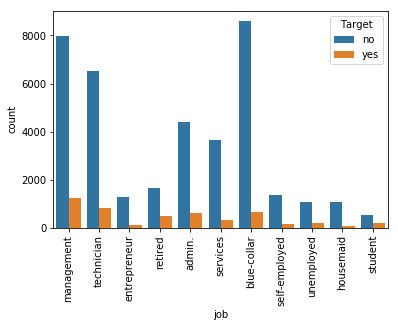

In [228]:
cp = sns.countplot(x="job", hue="Target",data=df)
cp.set_xticklabels(df["job"].unique(), rotation=90)

In [229]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,43193.0,40.764082,10.512640,18.0,33.0,39.0,48.0,95.0
balance,43193.0,1354.027342,3042.103625,-8019.0,71.0,442.0,1412.0,102127.0
day,43193.0,15.809414,8.305970,1.0,8.0,16.0,21.0,31.0
duration,43193.0,258.323409,258.162006,0.0,103.0,180.0,318.0,4918.0
campaign,43193.0,2.758178,3.063987,1.0,1.0,2.0,3.0,58.0
pdays,43193.0,40.404070,100.420624,-1.0,-1.0,-1.0,-1.0,871.0
previous,43193.0,0.584863,2.332672,0.0,0.0,0.0,0.0,275.0


In [230]:
df.info() # Shows no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
age          43193 non-null int64
job          43193 non-null object
marital      43193 non-null object
education    43193 non-null object
default      43193 non-null object
balance      43193 non-null int64
housing      43193 non-null object
loan         43193 non-null object
contact      43193 non-null object
day          43193 non-null int64
month        43193 non-null object
duration     43193 non-null int64
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
poutcome     43193 non-null object
Target       43193 non-null object
dtypes: int64(7), object(10)
memory usage: 7.2+ MB


In [231]:
# Label Encode the Target column to get into the correlation matrix, and see Target relation with other features
from sklearn.preprocessing import LabelEncoder
df['Target'] = LabelEncoder().fit_transform(df['Target'])

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
age          43193 non-null int64
job          43193 non-null object
marital      43193 non-null object
education    43193 non-null object
default      43193 non-null object
balance      43193 non-null int64
housing      43193 non-null object
loan         43193 non-null object
contact      43193 non-null object
day          43193 non-null int64
month        43193 non-null object
duration     43193 non-null int64
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
poutcome     43193 non-null object
Target       43193 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 7.0+ MB


Text(0.5, 1.0, 'Correlation Matrix')

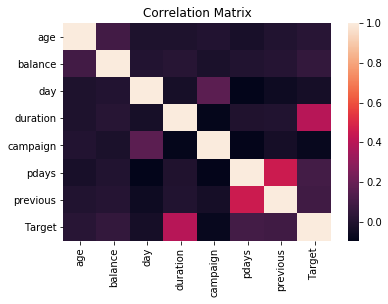

In [233]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.title("Correlation Matrix")
# Findings: 'duration' has direct impact on 'Target', they are correlated

In [234]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,Target
age,1.000000,0.097602,-0.008451,-0.004953,0.004050,-0.023248,0.001099,0.024760
balance,0.097602,1.000000,0.004118,0.020051,-0.016251,0.003928,0.016564,0.051386
day,-0.008451,0.004118,1.000000,-0.030074,0.164982,-0.094343,-0.052053,-0.030247
duration,-0.004953,0.020051,-0.030074,1.000000,-0.083118,-0.002403,0.000295,0.397393
campaign,0.004050,-0.016251,0.164982,-0.083118,1.000000,-0.088920,-0.032381,-0.072465
pdays,-0.023248,0.003928,-0.094343,-0.002403,-0.088920,1.000000,0.452953,0.101446
previous,0.001099,0.016564,-0.052053,0.000295,-0.032381,0.452953,1.000000,0.091764
Target,0.024760,0.051386,-0.030247,0.397393,-0.072465,0.101446,0.091764,1.000000


In [235]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,0
11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,0


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
age          43193 non-null int64
job          43193 non-null object
marital      43193 non-null object
education    43193 non-null object
default      43193 non-null object
balance      43193 non-null int64
housing      43193 non-null object
loan         43193 non-null object
contact      43193 non-null object
day          43193 non-null int64
month        43193 non-null object
duration     43193 non-null int64
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
poutcome     43193 non-null object
Target       43193 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 7.0+ MB


In [237]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,43193.0,40.764082,10.512640,18.0,33.0,39.0,48.0,95.0
balance,43193.0,1354.027342,3042.103625,-8019.0,71.0,442.0,1412.0,102127.0
day,43193.0,15.809414,8.305970,1.0,8.0,16.0,21.0,31.0
duration,43193.0,258.323409,258.162006,0.0,103.0,180.0,318.0,4918.0
campaign,43193.0,2.758178,3.063987,1.0,1.0,2.0,3.0,58.0
pdays,43193.0,40.404070,100.420624,-1.0,-1.0,-1.0,-1.0,871.0
previous,43193.0,0.584863,2.332672,0.0,0.0,0.0,0.0,275.0
Target,43193.0,0.116246,0.320523,0.0,0.0,0.0,0.0,1.0


### Deliverable – 2 (Prepare the data for analytics)
1.	Load the data into a data-frame. The data-frame should have data and column description.
2.	Ensure the attribute types are correct. If not, take appropriate actions.
3.	Transform the data i.e. scale / normalize if required
4.	Create the training set and test set in ration of 70:30


In [238]:
df.isna().apply(pd.value_counts)  # NO Missing Values 
 # uknowns are removed from various columns 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
False,43193,43193,43193,43193,43193,43193,43193,43193,43193,43193,43193,43193,43193,43193,43193,43193,43193


In [239]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
age          43193 non-null int64
job          43193 non-null object
marital      43193 non-null object
education    43193 non-null object
default      43193 non-null object
balance      43193 non-null int64
housing      43193 non-null object
loan         43193 non-null object
contact      43193 non-null object
day          43193 non-null int64
month        43193 non-null object
duration     43193 non-null int64
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
poutcome     43193 non-null object
Target       43193 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 7.0+ MB


In [241]:
# Separate both dataframes into 
#numeric_df = df.select_dtypes(exclude="object")
categorical_df = df.select_dtypes(include="object")

In [242]:
oneHotCols = categorical_df.columns

In [243]:
updated_df = pd.get_dummies(df, columns=oneHotCols)

In [244]:
y = df["Target"]

In [245]:
X = updated_df.drop(labels = "Target", axis=1)

In [246]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [247]:
y.head()

0    0
1    0
2    0
5    0
6    0
Name: Target, dtype: int32

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
age          43193 non-null int64
job          43193 non-null object
marital      43193 non-null object
education    43193 non-null object
default      43193 non-null object
balance      43193 non-null int64
housing      43193 non-null object
loan         43193 non-null object
contact      43193 non-null object
day          43193 non-null int64
month        43193 non-null object
duration     43193 non-null int64
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
poutcome     43193 non-null object
Target       43193 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 7.0+ MB


### Deliverable – 3 (create the ensemble model)
1.	Write python code using scikitlearn, pandas, numpy and others in Jupyter notebook to train and test the ensemble model.
2.	First create a model using standard classification algorithm. Note the model performance.
3.	Use appropriate algorithms and explain why that algorithm in the comment lines.
4.	Evaluate the model. Use confusion matrix to evaluate class level metrics i.e..Precision and recall. Also reflect the overall score of the model.
5.	Advantages and disadvantages of the algorithm.
6.	Build the ensemble models and compare the results with the base model. Note: Random forest can be used only with Decision trees. 


### Standard Classification Algorithms

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [251]:
from sklearn.metrics import f1_score

df_results = pd.DataFrame(data=np.zeros(shape=(6, 4)), columns = ['Model', 'Train Score', 'Test Score', 'F1 Score'])
print(df_results)

modelCnt = 0

   Model  Train Score  Test Score  F1 Score
0    0.0          0.0         0.0       0.0
1    0.0          0.0         0.0       0.0
2    0.0          0.0         0.0       0.0
3    0.0          0.0         0.0       0.0
4    0.0          0.0         0.0       0.0
5    0.0          0.0         0.0       0.0


In [252]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
train_score = lr_clf.score(X_train, y_train)
test_score = lr_clf.score(X_test, y_test)

y_pred = lr_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n ", cf_matrix)


df_results.loc[modelCnt, 'Model'] = "Logistic Regression"
df_results.loc[modelCnt, 'Train Score'] = train_score
df_results.loc[modelCnt, 'Test Score'] = test_score
df_results.loc[modelCnt, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')
 
print(df_results)

C:\Users\shard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: 
  [[11193   263]
 [  964   538]]
                 Model  Train Score  Test Score  F1 Score
0  Logistic Regression       0.9021    0.905309  0.892304
1                    0       0.0000    0.000000  0.000000
2                    0       0.0000    0.000000  0.000000
3                    0       0.0000    0.000000  0.000000
4                    0       0.0000    0.000000  0.000000
5                    0       0.0000    0.000000  0.000000


In [253]:
modelCnt = 1

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
train_score = nb_clf.score(X_train, y_train)
test_score = nb_clf.score(X_test, y_test)

y_pred = nb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n ", cf_matrix)


df_results.loc[modelCnt, 'Model'] = "Gaussian Naive Bayes"
df_results.loc[modelCnt, 'Train Score'] = train_score
df_results.loc[modelCnt, 'Test Score'] = test_score

from sklearn.metrics import recall_score, precision_score

print("recall score: ", recall_score(y_test, y_pred, average='weighted'))
print("precision score: ", precision_score(y_test, y_pred, average='weighted'))

df_results.loc[modelCnt, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

print(df_results)


Confusion Matrix: 
  [[10243  1213]
 [  697   805]]
recall score:  0.8526007099861089
precision score:  0.8739996591194126
                  Model  Train Score  Test Score  F1 Score
0   Logistic Regression     0.902100    0.905309  0.892304
1  Gaussian Naive Bayes     0.852555    0.852601  0.861706
2                     0     0.000000    0.000000  0.000000
3                     0     0.000000    0.000000  0.000000
4                     0     0.000000    0.000000  0.000000
5                     0     0.000000    0.000000  0.000000


In [254]:
modelCnt = 2


knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
train_score = knn_clf.score(X_train, y_train)
test_score = knn_clf.score(X_test, y_test)

y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cf_matrix)


df_results.loc[modelCnt, 'Model'] = "K Nearest Neighbhours"
df_results.loc[modelCnt, 'Train Score'] = train_score
df_results.loc[modelCnt, 'Test Score'] = test_score
df_results.loc[modelCnt, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

print(df_results)


Confusion Matrix:  [[11072   384]
 [ 1096   406]]
                   Model  Train Score  Test Score  F1 Score
0    Logistic Regression     0.902100    0.905309  0.892304
1   Gaussian Naive Bayes     0.852555    0.852601  0.861706
2  K Nearest Neighbhours     0.910236    0.885785  0.869766
3                      0     0.000000    0.000000  0.000000
4                      0     0.000000    0.000000  0.000000
5                      0     0.000000    0.000000  0.000000


In [255]:
modelCnt = 3
import time

 
svc_clf = SVC()
print("SCV initialization done....")

start_time = time.clock()
svc_clf.fit(X_train, y_train)
end_time = time.clock()
fit_time = end_time - start_time
print("SVC fit done in ", fit_time)

train_score = svc_clf.score(X_train, y_train)
print("SVC Train Score: ", train_score)

test_score = svc_clf.score(X_test, y_test)
print("SVC Test Score: ", test_score)


y_pred = svc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cf_matrix)


df_results.loc[modelCnt, 'Model'] = "Support Vector Machine"
df_results.loc[modelCnt, 'Train Score'] = train_score
df_results.loc[modelCnt, 'Test Score'] = test_score
df_results.loc[modelCnt, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

print(df_results)




SCV initialization done....


C:\Users\shard\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\shard\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shard\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


SVC fit done in  284.8795155000007
SVC Train Score:  0.994013560443195
SVC Test Score:  0.8840870504707516
Confusion Matrix:  [[11455     1]
 [ 1501     1]]
                    Model  Train Score  Test Score  F1 Score
0     Logistic Regression     0.902100    0.905309  0.892304
1    Gaussian Naive Bayes     0.852555    0.852601  0.861706
2   K Nearest Neighbhours     0.910236    0.885785  0.869766
3  Support Vector Machine     0.994014    0.884087  0.829846
4                       0     0.000000    0.000000  0.000000
5                       0     0.000000    0.000000  0.000000


In [ ]:
# Gets stuck forever
#svcL_clf = SVC(kernel='linear')
#svcL_clf.fit(X_train, y_train)
#train_score = svcL_clf.score(X_train, y_train)
#test_score = svcL_clf.score(X_test, y_test)
#print("SVC Linear Train Score: ", train_score)
#print("SVC Linear Test Score: ", test_score)

In [256]:
modelCnt = 4

dt_clf = DecisionTreeClassifier(criterion = 'entropy' )
dt_clf.fit(X_train, y_train)
train_score = dt_clf.score(X_train, y_train)
test_score = dt_clf.score(X_test, y_test)

y_pred = dt_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cf_matrix)


df_results.loc[modelCnt, 'Model'] = "Decision Trees-OneHot"
df_results.loc[modelCnt, 'Train Score'] = train_score
df_results.loc[modelCnt, 'Test Score'] = test_score
df_results.loc[modelCnt, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

print(df_results)



Confusion Matrix:  [[10672   784]
 [  791   711]]
                    Model  Train Score  Test Score  F1 Score
0     Logistic Regression     0.902100    0.905309  0.892304
1    Gaussian Naive Bayes     0.852555    0.852601  0.861706
2   K Nearest Neighbhours     0.910236    0.885785  0.869766
3  Support Vector Machine     0.994014    0.884087  0.829846
4   Decision Trees-OneHot     1.000000    0.878453  0.878330
5                       0     0.000000    0.000000  0.000000


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
age          43193 non-null int64
job          43193 non-null object
marital      43193 non-null object
education    43193 non-null object
default      43193 non-null object
balance      43193 non-null int64
housing      43193 non-null object
loan         43193 non-null object
contact      43193 non-null object
day          43193 non-null int64
month        43193 non-null object
duration     43193 non-null int64
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
poutcome     43193 non-null object
Target       43193 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 7.0+ MB


In [258]:
# Lets not use the One hot encoding for Decision Trees 
#Many columns are object type, need to convert them

modelCnt = 5
df_withObj = df.copy()

for column in df_withObj.columns:
    if df_withObj[column].dtype == type(object):
        #df_withObj[column] = df_withObj[column].astype('category').cat.codes
        le = LabelEncoder()
        df_withObj[column] = pd.Categorical(df_withObj[column])
        df_withObj[column] = le.fit_transform(df_withObj[column])

In [259]:
# Convert the columns into categorical variables
df_withObj['job'] = df_withObj['job'].astype('category').cat.codes
df_withObj['marital'] = df_withObj['marital'].astype('category').cat.codes
df_withObj['education'] = df_withObj['education'].astype('category').cat.codes
df_withObj['contact'] = df_withObj['contact'].astype('category').cat.codes
df_withObj['poutcome'] = df_withObj['poutcome'].astype('category').cat.codes
df_withObj['month'] = df_withObj['month'].astype('category').cat.codes
df_withObj['default'] = df_withObj['default'].astype('category').cat.codes
df_withObj['loan'] = df_withObj['loan'].astype('category').cat.codes
df_withObj['housing'] = df_withObj['housing'].astype('category').cat.codes

In [260]:
df_withObj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
age          43193 non-null int64
job          43193 non-null int8
marital      43193 non-null int8
education    43193 non-null int8
default      43193 non-null int8
balance      43193 non-null int64
housing      43193 non-null int8
loan         43193 non-null int8
contact      43193 non-null int8
day          43193 non-null int64
month        43193 non-null int8
duration     43193 non-null int64
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
poutcome     43193 non-null int8
Target       43193 non-null int32
dtypes: int32(1), int64(7), int8(9)
memory usage: 3.2 MB


In [261]:
X_tree =  df_withObj.drop(labels = "Target", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.3, random_state=1)

#criterion = 'entropy' , random_state = 100, max_depth=3, min_samples_leaf=5
dt_clf = DecisionTreeClassifier(criterion = 'entropy')
dt_clf.fit(X_train, y_train)

train_score = dt_clf.score(X_train, y_train)
test_score = dt_clf.score(X_test, y_test)

y_pred = dt_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cf_matrix)


df_results.loc[modelCnt, 'Model'] = "Decision Trees-Categorical"
df_results.loc[modelCnt, 'Train Score'] = train_score
df_results.loc[modelCnt, 'Test Score'] = test_score
df_results.loc[modelCnt, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')


print(pd.DataFrame(dt_clf.feature_importances_, columns=["Imp"], index=X_train.columns))

print(df_results)

Confusion Matrix:  [[10679   777]
 [  761   741]]
                Imp
age        0.089417
job        0.040048
marital    0.018784
education  0.015964
default    0.001483
balance    0.106563
housing    0.029057
loan       0.007311
contact    0.048404
day        0.083746
month      0.114272
duration   0.307190
campaign   0.032865
pdays      0.064512
previous   0.014582
poutcome   0.025802
                        Model  Train Score  Test Score  F1 Score
0         Logistic Regression     0.902100    0.905309  0.892304
1        Gaussian Naive Bayes     0.852555    0.852601  0.861706
2       K Nearest Neighbhours     0.910236    0.885785  0.869766
3      Support Vector Machine     0.994014    0.884087  0.829846
4       Decision Trees-OneHot     1.000000    0.878453  0.878330
5  Decision Trees-Categorical     1.000000    0.881309  0.881582


Feature "Duration" has maximum importance. This feature influences the result of term deposit subscription the most. Its the duration of conversation between sales representative and potential customer.
Incase of Decision Trees we see Train Score of 1, that shows overfitting, lets regularize the decision trees and see if it improves our test score and F1 score.

In [262]:
# Pruned and Regularized Decision Tree

dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=3,  min_samples_leaf=5)
dt_clf.fit(X_train, y_train)

train_score = dt_clf.score(X_train, y_train)
test_score = dt_clf.score(X_test, y_test)

y_pred = dt_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cf_matrix)


print("Train Score: ", train_score)
print("Test SCore: ", test_score)
print("F1 Score", f1_score(y_test, y_pred, average='weighted'))

Confusion Matrix:  [[11223   233]
 [ 1205   297]]
Train Score:  0.890722672399537
Test SCore:  0.8890260842722643
F1 Score 0.8647422307034713


### Findings:
Pruning/Regularization has not helped increase the score.

### Ensemble Models

In [263]:
ensemble_results = pd.DataFrame(data=np.zeros(shape=(4, 4)), columns = ['Ensemble Model', 'Train Score', 'Test Score', 'F1 Score'])
print(ensemble_results)

   Ensemble Model  Train Score  Test Score  F1 Score
0             0.0          0.0         0.0       0.0
1             0.0          0.0         0.0       0.0
2             0.0          0.0         0.0       0.0
3             0.0          0.0         0.0       0.0


In [264]:
enModelCnt = 0

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=18)
rf_clf.fit(X_train, y_train)

train_score = rf_clf.score(X_train, y_train)
test_score = rf_clf.score(X_test, y_test)

y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cf_matrix)


ensemble_results.loc[enModelCnt, 'Ensemble Model'] = "RandomForest"
ensemble_results.loc[enModelCnt, 'Train Score'] = train_score
ensemble_results.loc[enModelCnt, 'Test Score'] = test_score
ensemble_results.loc[enModelCnt, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

print(ensemble_results)

Confusion Matrix:  [[11127   329]
 [  920   582]]
  Ensemble Model  Train Score  Test Score  F1 Score
0   RandomForest     0.997255    0.903612   0.89302
1              0     0.000000    0.000000   0.00000
2              0     0.000000    0.000000   0.00000
3              0     0.000000    0.000000   0.00000


In [265]:
enModelCnt = 1

from sklearn.ensemble import BaggingClassifier
bg_clf = BaggingClassifier()
bg_clf.fit(X_train, y_train)

train_score = bg_clf.score(X_train, y_train)
test_score = bg_clf.score(X_test, y_test)

y_pred = bg_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cf_matrix)


ensemble_results.loc[enModelCnt, 'Ensemble Model'] = "Bagging"
ensemble_results.loc[enModelCnt, 'Train Score'] = train_score
ensemble_results.loc[enModelCnt, 'Test Score'] = test_score
ensemble_results.loc[enModelCnt, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

print(ensemble_results)

Confusion Matrix:  [[11070   386]
 [  922   580]]
  Ensemble Model  Train Score  Test Score  F1 Score
0   RandomForest     0.997255    0.903612  0.893020
1        Bagging     0.992029    0.899058  0.889251
2              0     0.000000    0.000000  0.000000
3              0     0.000000    0.000000  0.000000


In [266]:
enModelCnt = 2

from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier()
adb_clf.fit(X_train, y_train)

train_score = adb_clf.score(X_train, y_train)
test_score = adb_clf.score(X_test, y_test)

y_pred = adb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cf_matrix)


ensemble_results.loc[enModelCnt, 'Ensemble Model'] = "AdaBoosting"
ensemble_results.loc[enModelCnt, 'Train Score'] = train_score
ensemble_results.loc[enModelCnt, 'Test Score'] = test_score
ensemble_results.loc[enModelCnt, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

print(ensemble_results)

Confusion Matrix:  [[11107   349]
 [  961   541]]
  Ensemble Model  Train Score  Test Score  F1 Score
0   RandomForest     0.997255    0.903612  0.893020
1        Bagging     0.992029    0.899058  0.889251
2    AdaBoosting     0.897867    0.898904  0.887286
3              0     0.000000    0.000000  0.000000


In [267]:
enModelCnt = 3

from sklearn.ensemble import GradientBoostingClassifier
gdb_clf = GradientBoostingClassifier()
gdb_clf.fit(X_train, y_train)

train_score = gdb_clf.score(X_train, y_train)
test_score = gdb_clf.score(X_test, y_test)

y_pred = gdb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cf_matrix)


ensemble_results.loc[enModelCnt, 'Ensemble Model'] = "GradientBoosting"
ensemble_results.loc[enModelCnt, 'Train Score'] = train_score
ensemble_results.loc[enModelCnt, 'Test Score'] = test_score
ensemble_results.loc[enModelCnt, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

print(ensemble_results)

Confusion Matrix:  [[11145   311]
 [  901   601]]
     Ensemble Model  Train Score  Test Score  F1 Score
0      RandomForest     0.997255    0.903612  0.893020
1           Bagging     0.992029    0.899058  0.889251
2       AdaBoosting     0.897867    0.898904  0.887286
3  GradientBoosting     0.910071    0.906467  0.896211


In [268]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6864929047117809

### Findings:
Almost all of the models : basic algorithms and ensemble models perform almost similar to each other. Of all the ensemble techniques Gradient Boosting Ensemble Technique has max F1 score. Lets go with it and try to tune some of its hyperparameters to see if we can increase our performance.

### Deliverable – 4 (Tuning the model)
1.	Discuss some of the key hyper parameters available for the selected algorithm. What values did you initialize these parameters to?
2.	Regularization techniques used for the model.
3.	Range estimate at 95% confidence for the model performance in production. 


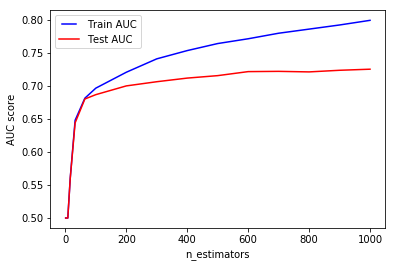

In [269]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [270]:
# loss='deviance', learning_rate=0.2, n_estimators=150, subsample=1.0, criterion='friedman_mse'
# 
# GradientBoost Tuning 
gdb_clf = GradientBoostingClassifier(random_state=1, n_estimators= 500) 
print(gdb_clf)

gdb_clf.fit(X_train, y_train)

train_score = gdb_clf.score(X_train, y_train)
test_score = gdb_clf.score(X_test, y_test)

y_pred = gdb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print("Gradient Boosting Classifier Hyperparameter Tuning......")

print("Confusion Matrix: \n", cf_matrix)
print('Train Score',train_score)
print('Test Score', test_score )
print('F1 Score', f1_score(y_test, y_pred, average='weighted'))


from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Gradient Boosting Classifier Hyperparameter Tuning......
Confusion Matrix: 
 [[11071   385]
 [  804   698]]
Train Score 0.9293203241276666
Test Score 0.9082420126562741
F1 Score 0.9016294716419373


0.7155534357355928

### Gradient Boosting gives F1 score of 90.2 % 
